<p align= " center"> <strong>LINEAR REGRESSION MODEL</p>
<p><b>By: Jefferson C.</b></p>

---

### __Data__

In [2]:
import pandas as pd
import numpy as np

# Data 
data = pd.read_csv('NY-House-Dataset/NY-House-Dataset.csv')
num_data = pd.read_csv('NY-House-Dataset/NY-House-Numerical.csv')
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRICE             4801 non-null   int64  
 1   BEDS              4801 non-null   int64  
 2   BATH              4801 non-null   float64
 3   PROPERTYSQFT      4801 non-null   float64
 4   LATITUDE          4801 non-null   float64
 5   LONGITUDE         4801 non-null   float64
 6   LOG-PRICE         4801 non-null   float64
 7   LOG-PROPERTYSQFT  4801 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 300.2 KB


### __Linear Regression Model__

__Models__

- __Population Model__
$$ y_i = \ln(Price_i) = \mathbf{\beta_0} + \mathbf{\beta_1} (Bets_i) +  \mathbf{\beta_2}(Bath_i) + \mathbf{\beta_3}  \ln(Propertysqft_i) + u_i   $$

- __Sampling Model__
$$ \hat{y_i} = \widehat{\ln(Price_i)} = \mathbf{\hat{\beta_0}} + \mathbf{\hat{\beta_1}} (Bets_i) +  \mathbf{\hat{\beta_2}}(Bath_i) + \mathbf{\hat{\beta_3}}  \ln(Propertysqft_i) +\hat{u_i}  $$

In [179]:
# LINEAR REGRESSION MODEL (LRM)
import statsmodels.api as sm

# Dependent Variable
Y = num_data['LOG-PRICE']
# Independent Variable 
X = num_data[['BEDS', 'BATH','LOG-PROPERTYSQFT']]

# Intercept 
X = sm.add_constant(X)
# LRM
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              LOG-PRICE   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     1119.
Date:                Fri, 30 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:32:56   Log-Likelihood:                -5678.8
No. Observations:                4801   AIC:                         1.137e+04
Df Residuals:                    4797   BIC:                         1.139e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.7451      0.165  

### __Assumptions__

#### 1. __RESET RAMSEY TEST__ 

The model : 
$$ y_i = \ln(Price_i) = \mathbf{\beta_0} + \mathbf{\beta_1} (Bets_i) +  \mathbf{\beta_2}(Bath_i) + \mathbf{\beta_3}  \ln(Propertysqft_i) + u_i   $$

Now, we suppose the RAMSEY MODEL:
$$ y_i = \ln(Price_i) = \mathbf{\beta_0} + \mathbf{\beta_1} (Bets_i) +  \mathbf{\beta_2}(Bath_i) + \mathbf{\beta_3}  \ln(Propertysqft_i) + \qquad\gamma_1 \hat{y}_i^2+ \gamma_2 \hat{y}_i^3 + \dots + \qquad u_i   $$

$$ y_i = \ln(Price_i) = \mathbf{\beta_0} + \mathbf{\beta_1} (Bets_i) +  \mathbf{\beta_2}(Bath_i) + \mathbf{\beta_3}  \ln(Propertysqft_i) + \qquad\sum_{j=1}^{k}{\gamma_j (\hat{y}_i^{j+1})} \qquad+ \hat{u_i}   $$

- Hypothesis: 

    - Ho) The model is correctly specificated $$\qquad(\gamma_1 = \dots = \gamma_k = 0)  $$
    - H1) The model is not correctly specificated $$\qquad(\exist \space j \space\text{such that} \space \gamma_j \neq 0)  $$

In [180]:
# RESET TEST 
from statsmodels.stats.diagnostic import linear_reset

alpha = 0.05

# TEST
reset = linear_reset(model,power=2,use_f=True)
f_stat, p_value = reset.fvalue,reset.pvalue

print(f'RESET TEST \nF - STAT: {f_stat:.2f}\nP - VALUE :{p_value:.3f}')
if alpha > p_value:
     print('\nDecision : Reject Ho')
else: print ('\nDecision : Do not reject Ho')

RESET TEST 
F - STAT: 384.41
P - VALUE :0.000

Decision : Reject Ho


1.1 __Data Transform__

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [182]:
# DATA TRANSFORM 

# Add cualitative variables to num_data
num_data['SUBLOCALITY'] = data['SUBLOCALITY']
num_data['TYPE'] = data['TYPE']

# Count values
display(num_data['SUBLOCALITY'].value_counts())
display(num_data['TYPE'].value_counts())

SUBLOCALITY
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Flushing               4
Riverdale              4
Coney Island           3
East Bronx             1
Jackson Heights        1
Brooklyn Heights       1
Rego Park              1
Fort Hamilton          1
Dumbo                  1
Snyder Avenue          1
Name: count, dtype: int64

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

In [183]:
# GOUP BY

# BOROUGH
def map_borough(x):
    """
        Group SUBLOCALITY by Borought

    Parameters
    --------------
    x : value of data frame (SUBLOCALITY)
    """
    if x in ["New York", "New York County", "Manhattan"]:
        return "MANHATTAN"
    elif x in ["Kings County", "Brooklyn", "Coney Island", "Brooklyn Heights", "Dumbo","Snyder Avenue"]:
        return "BROOKLYN"
    elif x in ["Queens", "Queens County", "Flushing", "Jackson Heights", "Rego Park"]:
        return "QUEENS"
    elif x in ["Bronx County", "The Bronx", "Riverdale", "East Bronx"]:
        return "BRONX"
    elif x in ["Richmond County", "Staten Island"]:
        return "STATEN_ISLAND"
    else:
        return "OTHER"
    
# Apply the function & Summary
num_data["BOROUGH"] = num_data["SUBLOCALITY"].apply(map_borough)
display(num_data["BOROUGH"].value_counts())

# TYPE 
def map_type(x):
    """
        Group by Type

    Parameters
    --------------
    x : value of data frame (TYPE)
    """
    if x in ["Condo for sale", "Co-op for sale"]:
        return "CONDO_COOP"
    elif x in ["House for sale", "Townhouse for sale"]:
        return "HOUSE"
    elif x == "Multi-family home for sale":
        return "MULTI_FAMILY"
    else:
        return "OTHER"

# Apply the function & Summary
num_data["TYPE-GROUP"] = num_data["TYPE"].apply(map_type)
num_data["TYPE-GROUP"].value_counts()

BOROUGH
MANHATTAN        1323
QUEENS           1245
BROOKLYN         1197
STATEN_ISLAND     539
BRONX             496
OTHER               1
Name: count, dtype: int64

TYPE-GROUP
CONDO_COOP      2341
HOUSE           1311
MULTI_FAMILY     727
OTHER            422
Name: count, dtype: int64

1.2 __Linear Regression Model 2__

- __Population Model__
$$ y_i = \ln(Price_i) = \mathbf{\beta_0} + \mathbf{\beta_1} (Bets_i) +  \mathbf{\beta_2}(Bath_i) + \mathbf{\beta_3}  \ln(Propertysqft_i) + \sum_{d \neq d_0}{\gamma_d \cdot 1(Borough_i = d)} + \sum_{p \neq p_0 }\delta_p\cdot 1(Housing\space Type_i=p) + u_i$$

- __Sampling Model__
$$ \hat{y_i} = \widehat{\ln(Price_i)} = \mathbf{\hat{\beta_0}} + \mathbf{\hat{\beta_1}} (Bets_i) +  \mathbf{\hat{\beta_2}}(Bath_i) + \mathbf{\hat{\beta_3}}  \ln(Propertysqft_i) + \sum_{d \neq d_0}{\hat{\gamma} \cdot 1(Borough=d)} + \sum_{p \neq p_0 }\hat{\delta}\cdot 1(Housing \space Type_i=p) + \hat{u_i} $$

In [184]:
# LINEAR REGRESSION MODEL
import statsmodels.formula.api as smf
    
model_2 = smf.ols("Q('LOG-PRICE') ~ BEDS + BATH + Q('LOG-PROPERTYSQFT') + C(BOROUGH)+ C(Q('TYPE-GROUP'))",data=num_data).fit()
    
print(model_2.summary())

# RESET TEST 
alpha = 0.05

# TEST
reset = linear_reset(model_2,power=2,use_f=True)
f_stat, p_value = reset.fvalue,reset.pvalue

print(f'\n\nRESET TEST \nF - STAT: {f_stat:.2f}\nP - VALUE :{p_value:.3f}')
if alpha > p_value:
     print('\nDecision : Reject Ho')
else: print ('\nDecision : Do not reject Ho')

                            OLS Regression Results                            
Dep. Variable:         Q('LOG-PRICE')   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     584.4
Date:                Fri, 30 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:32:56   Log-Likelihood:                -4909.5
No. Observations:                4801   AIC:                             9843.
Df Residuals:                    4789   BIC:                             9921.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

These and the following assumpitons is very important for inference; but they are not crucial for when we focus on prediction.


#### __2. NORMALITY OF RESIDUALS__

In the sampling model the residuals are : 
$$\hat{u_i} = y_i -\hat{y_i} $$

Now, we prove that: 
$$\hat{u_i} \sim N(\mu= 0,\sigma^2) $$

- Hypothesis: 

    - Ho) The residuals are normal $$\hat{u_i} \sim N(0,\sigma^2) $$
    - H1) The residuals are not normal $$\hat{u_i} \nsim N(0,\sigma^2) $$

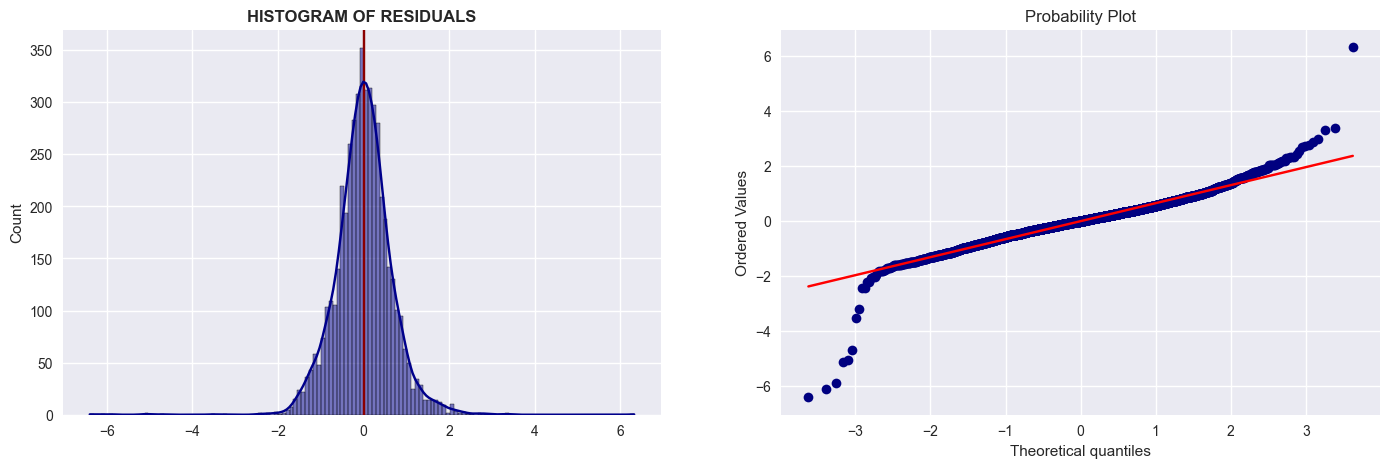

JAQUE BERA TEST 

JB Value : 14530.20
JB Prob : 0.000

Decision : Reject Ho


In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import jarque_bera

# RESIDUALS
res = model_2.resid
# Import Residuals
num_data['RESIDUALS'] = model_2.resid

# GRAPHS 
plt.style.use('seaborn-v0_8')
fig,ax = plt.subplots(1,2,figsize = (17,5))

# Histogram of residuals 
ax[0].set_title ('HISTOGRAM OF RESIDUALS',fontweight='bold')
ax[0].axvline(0,color = 'darkred')
sns.histplot(res,kde=True, color='darkblue',ax=ax[0])

# Probability plot
stats.probplot(res,dist='norm',plot=ax[1])
ax[1].get_lines()[0].set_color('navy')

plt.show()

# JAQUE - BERA TEST
JB_stat, JB_prob = jarque_bera(res)
print(f'JAQUE BERA TEST \n\nJB Value : {JB_stat:.2f}\nJB Prob : {JB_prob:.3f}')
if 0.05 > JB_prob:
     print('\nDecision : Reject Ho')
else: print ('\nDecision : Do not reject Ho')

#### __3. HOMOCEDASTY OF RESIDUALS AND LINEALITY__
In the sampling model the residuals are : 
$$\hat{u}_i = y_i -\hat{y_i} $$

Now, we prove that: 
$$\hat{u}_i \sim N(\mu= 0,\sigma^2) $$

- Hypothesis: 

    - Ho) The residuals are homoscedastic (they have constant variance) $$\sigma^2_1 =\sigma^2_2 = \dots=\sigma^2_n $$
    - H1) The residuals are heteroscedastic (they do not have constant variance) $$\sigma^2_1 \neq \sigma^2_2 \neq \dots \neq \sigma^2_n$$

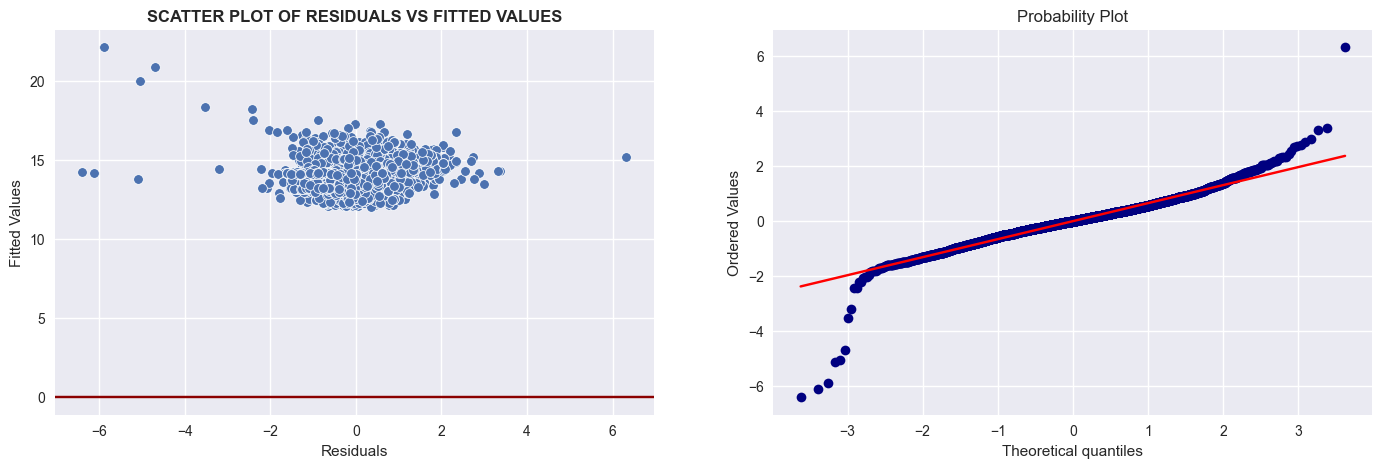

BREUSCH PAGAN TEST 

BP Value : 687.73
BP Prob : 0.000

Decision : Reject Ho


In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Adjusted Values
fitted = model_2.fittedvalues
num_data['Y-HAT'] = model_2.fittedvalues


# GRAPHS 
plt.style.use('seaborn-v0_8')
fig,ax = plt.subplots(1,2,figsize = (17,5))

# Histogram of residuals 
ax[0].set_title ('SCATTER PLOT OF RESIDUALS VS FITTED VALUES',fontweight='bold')
ax[0].set_ylabel('Fitted Values')
ax[0].set_xlabel('Residuals')
ax[0].axhline(0,color = 'darkred')
sns.scatterplot(y=fitted,x=res,ax=ax[0])

# Probability plot
stats.probplot(res,dist='norm',plot=ax[1])
ax[1].get_lines()[0].set_color('navy')

plt.show()

# BREUSCH PAGAN TEST
bp_test = het_breuschpagan(res,model_2.model.exog)
print(f'BREUSCH PAGAN TEST \n\nBP Value : {bp_test[0]:.2f}\nBP Prob : {bp_test[1]:.3f}')
if 0.05 > bp_test[1]:
     print('\nDecision : Reject Ho')
else: print ('\nDecision : Do not reject Ho')

#### __4. MULTICOLINEALITY__
In the sampling model are : 
$$ \hat{y_i} = \widehat{\ln(Price_i)} = \mathbf{\hat{\beta_0}} + \mathbf{\hat{\beta_1}} (Bets_i) +  \mathbf{\hat{\beta_2}}(Bath_i) + \mathbf{\hat{\beta_3}}  \ln(Propertysqft_i) + \sum_{d \neq d_0}{\hat{\gamma} \cdot 1(Borough=d)} + \sum_{p \neq p_0 }\hat{\delta}\cdot 1(Housing \space Type_i=p) + \hat{u_i} $$
Now, we prove that Don't exist several multicolineality using : 

1. correlation matrix 
    - if the values exceed to 0.8 this implicate that we have several correlation between the variables.

2. __VIF__ (Variance Inflation Factor)

    It measures how much the variance of a coefficient is inflated due to multicollinearity with other variables.
$$ VIF_i = \frac{1}{Tolerance}= \frac{1}{1-R^2_i}$$
        
 - $\space VIF_i = 1 \to$ No correlation  
 - $\space VIF_i \in [1,5] \to$ Moderate Correlation
 - $\space VIF_i > [5,10] \to$ High Multicolinearity
 - $\space VIF_i > 10 \to$ Severe Multicolinearity

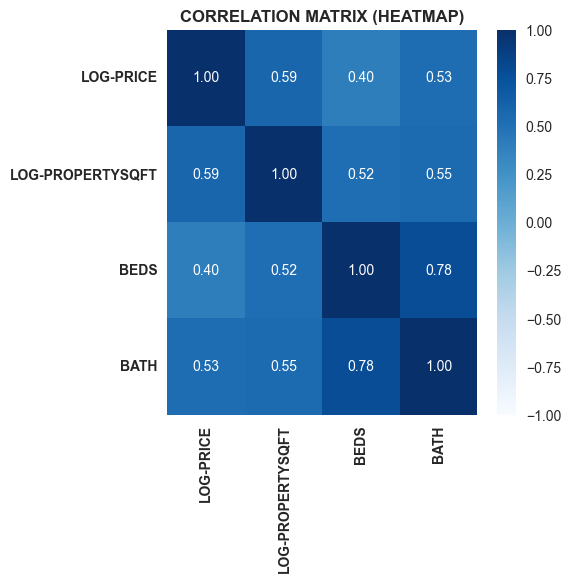

           Variable         VIF
0             const  306.709958
1         LOG-PRICE    1.699966
2  LOG-PROPERTYSQFT    1.798973
3              BEDS    2.624610
4              BATH    2.972351


In [ ]:
# MULTICOLINEALITY 
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


corr_vars = num_data[['LOG-PRICE','LOG-PROPERTYSQFT', 'BEDS', 'BATH' ]]
corr = corr_vars.corr()

# HEATMAP (CORRELATION MATRIX)
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.2f',vmin=-1,vmax=1)
plt.title('CORRELATION MATRIX (HEATMAP)',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

# VIF (VARIANCE INFLATION FACTOR)
X_constant = add_constant(corr_vars)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

# VIF for each variable
print(vif_data)


In [188]:
# LINEAR REGRESSION MODEL
import statsmodels.formula.api as smf
    
model_3 = smf.ols("Q('LOG-PRICE') ~ BATH + Q('LOG-PROPERTYSQFT') + C(BOROUGH)+ C(Q('TYPE-GROUP'))",data=num_data).fit()
    
print(model_3.summary())

# RESET TEST 
alpha = 0.05

# TEST
reset = linear_reset(model_3,power=2,use_f=True)
f_stat, p_value = reset.fvalue,reset.pvalue

print(f'\n\nRESET TEST \nF - STAT: {f_stat:.2f}\nP - VALUE :{p_value:.3f}')
if alpha > p_value:
     print('\nDecision : Reject Ho')
else: print ('\nDecision : Do not reject Ho')

                            OLS Regression Results                            
Dep. Variable:         Q('LOG-PRICE')   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     639.1
Date:                Fri, 30 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:32:57   Log-Likelihood:                -4917.7
No. Observations:                4801   AIC:                             9857.
Df Residuals:                    4790   BIC:                             9929.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

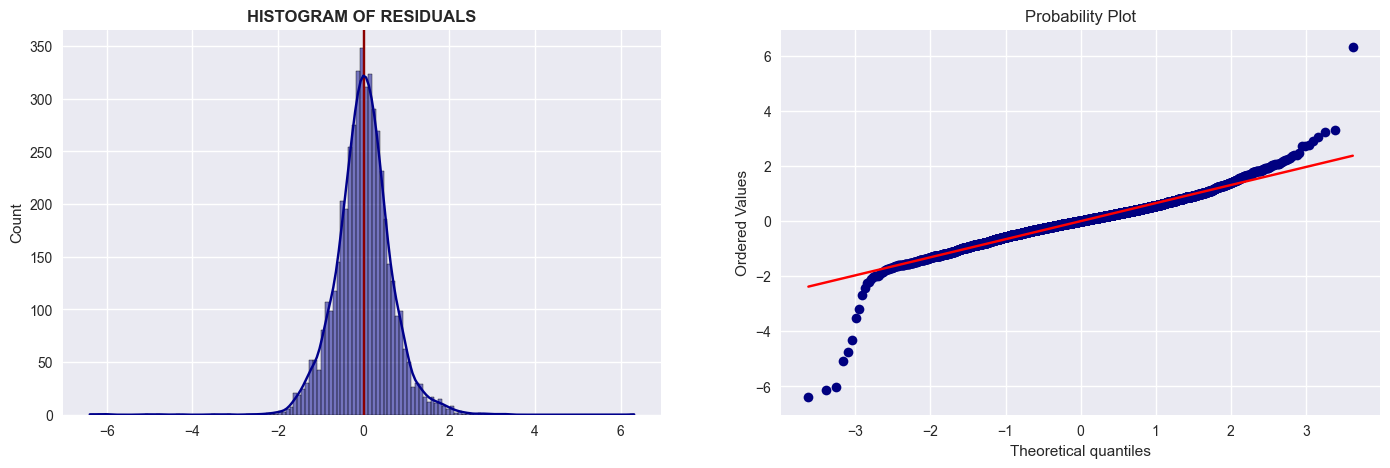

JAQUE BERA TEST 

JB Value : 13904.95
JB Prob : 0.000

Decision : Reject Ho


In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import jarque_bera

# RESIDUALS
res = model_3.resid
# Import Residuals
num_data['RESIDUALS'] = model_3.resid

# GRAPHS 
plt.style.use('seaborn-v0_8')
fig,ax = plt.subplots(1,2,figsize = (17,5))

# Histogram of residuals 
ax[0].set_title ('HISTOGRAM OF RESIDUALS',fontweight='bold')
ax[0].axvline(0,color = 'darkred')
sns.histplot(res,kde=True, color='darkblue',ax=ax[0])

# Probability plot
stats.probplot(res,dist='norm',plot=ax[1])
ax[1].get_lines()[0].set_color('navy')

plt.show()

# JAQUE - BERA TEST
JB_stat, JB_prob = jarque_bera(res)
print(f'JAQUE BERA TEST \n\nJB Value : {JB_stat:.2f}\nJB Prob : {JB_prob:.3f}')
if 0.05 > JB_prob:
     print('\nDecision : Reject Ho')
else: print ('\nDecision : Do not reject Ho')

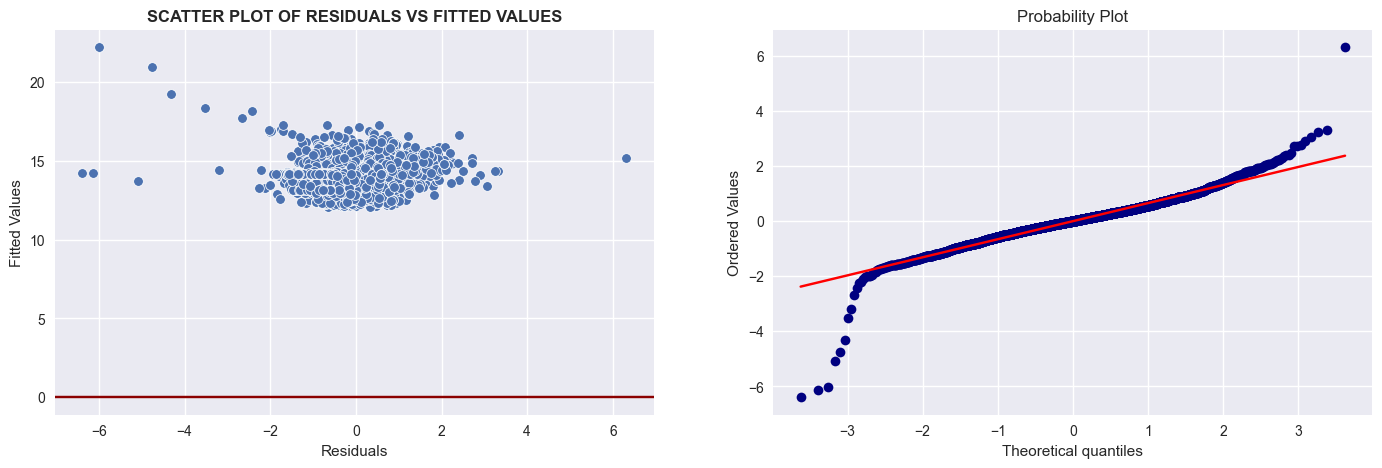

BREUSCH PAGAN TEST 

BP Value : 704.05
BP Prob : 0.000

Decision : Reject Ho


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Adjusted Values
fitted = model_3.fittedvalues
num_data['Y-HAT'] = model_3.fittedvalues
                         

# GRAPHS 
plt.style.use('seaborn-v0_8')
fig,ax = plt.subplots(1,2,figsize = (17,5))

# Histogram of residuals 
ax[0].set_title ('SCATTER PLOT OF RESIDUALS VS FITTED VALUES',fontweight='bold')
ax[0].set_ylabel('Fitted Values')
ax[0].set_xlabel('Residuals')
ax[0].axhline(0,color = 'darkred')
sns.scatterplot(y=fitted,x=res,ax=ax[0])

# Probability plot
stats.probplot(res,dist='norm',plot=ax[1])
ax[1].get_lines()[0].set_color('navy')

plt.show()

# BREUSCH PAGAN TEST
bp_test = het_breuschpagan(res,model_3.model.exog)
print(f'BREUSCH PAGAN TEST \n\nBP Value : {bp_test[0]:.2f}\nBP Prob : {bp_test[1]:.3f}')
if 0.05 > bp_test[1]:
     print('\nDecision : Reject Ho')
else: print ('\nDecision : Do not reject Ho')

4.1 __Linear Regression Model 3__

- __Population Model__
$$ y_i = \ln(Price_i) = \mathbf{\beta_0} +  \mathbf{\beta_1}(Bath_i) + \mathbf{\beta_2}  \ln(Propertysqft_i) + \sum_{d \neq d_0}{\gamma_d \cdot 1(Borough_i = d)} + \sum_{p \neq p_0 }\delta_p\cdot 1(Housing\space Type_i=p) + u_i$$

- __Sampling Model__
$$ \hat{y_i} = \widehat{\ln(Price_i)} = \mathbf{\hat{\beta_0}}  +  \mathbf{\hat{\beta_1}}(Bath_i) + \mathbf{\hat{\beta_2}}  \ln(Propertysqft_i) + \sum_{d \neq d_0}{\hat{\gamma_d} \cdot 1(Borough=d)} + \sum_{p \neq p_0 }\hat{\delta_p}\cdot 1(Housing \space Type_i=p) + \hat{u_i} $$

#### 5. __INDEPENDENCE__ 

In the sampling model, it is important that the residuals and variable independent are not correlated. To verify this concept, we apply:

__DURBIN WATSON TEST__

This test evaluates if there is first-order correlation between residuals and independent variables: 

$$ DW = \frac{\sum_{t=2}^{T} (e_t - e_{t-1})^2}{\sum_{t=1}^{T} e_t^2}$$

considerations:
 - $\space DW_i \in [0,1.5] \to$ Positively Correlated (high correlation)
 - $\space DW_i \in [1.5, 2.5] \to$ No Autocorrelation (normal correlation)
 - $\space DW_i \in [2.5, 4] \to$ Negatively Correlated (negative correlation)

In [191]:
# DURBIN WATSON TEST 
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Test
dw_value = durbin_watson(res)

print(f"Durbin-Watson: {dw_value}")

Durbin-Watson: 2.0137243938702167


### __Import Data__

In [195]:
# IMPORT DATA TO CSV
num_data.to_csv('NY-House-Regression.csv',index=False)

In [196]:
# VERIFY data frame 
pd.read_csv('NY-House-Dataset/NY-House-Regression.csv').head(9)

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,LOG-PRICE,LOG-PROPERTYSQFT,SUBLOCALITY,TYPE,BOROUGH,TYPE-GROUP,RESIDUALS,Y-HAT
0,315000,2,2.000000,1400.000000,40.761255,-73.974483,12.660328,7.244228,Manhattan,Condo for sale,MANHATTAN,CONDO_COOP,-1.399657,14.059985
1,195000000,7,10.000000,17545.000000,40.766393,-73.980991,19.088510,9.772524,New York County,Condo for sale,MANHATTAN,CONDO_COOP,2.412883,16.675627
2,260000,4,2.000000,2015.000000,40.541805,-74.196109,12.468437,7.608374,Richmond County,House for sale,STATEN_ISLAND,HOUSE,-1.200283,13.668720
3,69000,3,1.000000,445.000000,40.761398,-73.974613,11.141862,6.098074,New York County,Condo for sale,MANHATTAN,CONDO_COOP,-2.116123,13.257985
4,55000000,7,2.373861,14175.000000,40.767224,-73.969856,17.822844,9.559235,New York County,Townhouse for sale,MANHATTAN,HOUSE,1.949527,15.873317
5,690000,5,2.000000,4004.000000,40.674363,-73.958725,13.444447,8.295049,Kings County,House for sale,BROOKLYN,HOUSE,-0.984958,14.429405
6,899500,2,2.000000,2184.207862,40.809448,-73.946777,13.709594,7.689009,New York,Condo for sale,MANHATTAN,CONDO_COOP,-0.604922,14.314516
7,16800000,8,16.000000,33000.000000,40.595002,-74.106424,16.636889,10.404263,Richmond County,House for sale,STATEN_ISLAND,HOUSE,-0.677200,17.314089
8,265000,1,1.000000,750.000000,40.821586,-73.874089,12.487485,6.620073,East Bronx,Co-op for sale,BRONX,CONDO_COOP,0.136748,12.350738


### __Exploratory__

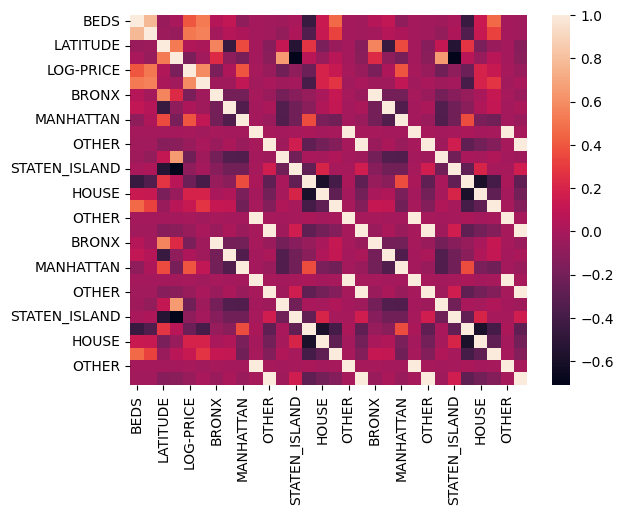

In [9]:
# MULTICOLINEALITY MAP
import geopandas as gpd 
import seaborn as sns
import matplotlib.pyplot as plt

ols_data = gpd.read_file('NY-House-Dataset/NY-House-SHP/VORONOI.shp')

# Treatment Data 

# Dummy Variables 
borought_dummies = pd.get_dummies(ols_data['BOROUGH']).astype(int)
group_dummies = pd.get_dummies(ols_data['TYPE-GROUP']).astype(int)

# Add to data frame (ols_data)
ols_data = pd.concat([ols_data,borought_dummies,group_dummies],axis=1)

matrix= ols_data[['BEDS', 'BATH', 'LATITUDE', 'LONGITUDE',
       'LOG-PRICE', 'LOG-PROPER','BRONX', 'BROOKLYN',
       'MANHATTAN', 'OTHER', 'QUEENS', 'STATEN_ISLAND', 'CONDO_COOP', 'HOUSE',
       'MULTI_FAMILY', 'OTHER', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'OTHER',
       'QUEENS', 'STATEN_ISLAND', 'CONDO_COOP', 'HOUSE', 'MULTI_FAMILY',
       'OTHER']].corr()

sns.heatmap(matrix)
plt.show()

---